I would like to credit Kaggle for granting me permission to use the dataset for my analysis. The dataset can be found here https://www.kaggle.com/datasets/seifmohmed/candy-data.

Questions

1. eliminate unnecessary columns and those with excessive NaN values
2. simplify column names for ease of use
3. NaN values in the 'going out' column
4. NaN values in the 'sex' column cleaned
5. NaNs in the 'age' column, and why was the median age chosen for consistency?
6. NaNs  in the 'country' column
7.'area' column 
8. NaNs in the 'Q6' columns
9. NaNs in the 'dress' column
10. NaNs handled in the 'day' column 
11. What is the most loved candy? What is the most hated candy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max.columns',False)
pd.set_option('display.max.rows',None)

In [2]:
#Loading data
df = pd.read_excel("C:/Users/hafei/Downloads/candyhierarchy2017.xlsx")

df.head()

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,...,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,...,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,

In [3]:
num_of_rows, num_of_columns = df.shape
print (f' The df has {num_of_rows} rows and {num_of_columns} columns')

 The df has 2460 rows and 120 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
df.columns.to_list()

['Internal ID',
 'Q1: GOING OUT?',
 'Q2: GENDER',
 'Q3: AGE',
 'Q4: COUNTRY',
 'Q5: STATE, PROVINCE, COUNTY, ETC',
 'Q6 | 100 Grand Bar',
 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Q6 | Any full-sized candy bar',
 'Q6 | Black Jacks',
 'Q6 | Bonkers (the candy)',
 'Q6 | Bonkers (the board game)',
 'Q6 | Bottle Caps',
 "Q6 | Box'o'Raisins",
 'Q6 | Broken glow stick',
 'Q6 | Butterfinger',
 'Q6 | Cadbury Creme Eggs',
 'Q6 | Candy Corn',
 'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
 'Q6 | Caramellos',
 'Q6 | Cash, or other forms of legal tender',
 'Q6 | Chardonnay',
 'Q6 | Chick-o-Sticks (we don’t know what that is)',
 'Q6 | Chiclets',
 'Q6 | Coffee Crisp',
 'Q6 | Creepy Religious comics/Chick Tracts',
 'Q6 | Dental paraphenalia',
 'Q6 | Dots',
 'Q6 | Dove Bars',
 'Q6 | Fuzzy Peaches',
 'Q6 | Generic Brand Acetaminophen',
 'Q6 | Glow sticks',
 'Q6 | Goo Goo Clusters',
 "Q6 | Good N' Plenty",
 'Q6 | Gum fro

In [6]:
missing = df.isna().sum()
missing

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [7]:
percentage_of_missing = ((df.isnull().sum()/len(df))*100).round(2)

missing_value =  pd.DataFrame({'Percentage of missing values':percentage_of_missing,'Missing Value':missing})
print(missing_value)

                                                    Percentage of missing values  Missing Value
Internal ID                                                                 0.00              0
Q1: GOING OUT?                                                              4.47            110
Q2: GENDER                                                                  1.67             41
Q3: AGE                                                                     3.41             84
Q4: COUNTRY                                                                 2.60             64
Q5: STATE, PROVINCE, COUNTY, ETC                                            4.07            100
Q6 | 100 Grand Bar                                                         30.37            747
Q6 | Anonymous brown globs that come in black a...                         29.84            734
Q6 | Any full-sized candy bar                                              27.32            672
Q6 | Black Jacks                        

In [8]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [9]:
df.duplicated(keep=False).any()

False

The data is messy with missing values, requiring cleaning. Column names need clarity, and variable types must be corrected. Fortunately, there are no duplicate values.

dropping unnecessary and renaming column 

In [10]:
#  Drop all the useless columns and rows with too much NaN
df.drop(['Unnamed: 113', 'Internal ID', 'Q9: OTHER COMMENTS', 'Click Coordinates (x, y)', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER', ], axis='columns', inplace = True)

# rename
new_names = {'Q1: GOING OUT?': 'going out', 'Q2: GENDER':'sex', 'Q3: AGE': 'age', \
    'Q4: COUNTRY': 'country', 'Q5: STATE, PROVINCE, COUNTY, ETC': 'state', \
    'Q10: DRESS':'dress', 'Q11: DAY':'day', 'Q12: MEDIA [Daily Dish]':'daily dish',\
        'Q12: MEDIA [Science]':'science', 'Q12: MEDIA [ESPN]':'espn', 'Q12: MEDIA [Yahoo]':'yahoo'}
df.rename(columns=new_names, inplace=True)

In [11]:
df.shape

(2460, 114)

going out column

In [12]:
df['going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [13]:
df['going out'].fillna('Maybe', inplace=True)
df['going out'].value_counts()/df.shape [0]*100

going out
No       82.845528
Yes      12.682927
Maybe     4.471545
Name: count, dtype: float64

sex column

In [14]:
df['sex'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [15]:
# Fill NaN values in 'sex' column with "Didn't say"
df['sex'].fillna("Didn't say", inplace=True)
# Replace specific values in 'sex' column with "Didn't say"
df['sex'].replace({"I'd rather not say":"Didn't say", "Other":"Didn't say"},inplace=True)
print(df['sex'].value_counts()/df.shape[0]*100)



sex
Male          59.634146
Female        34.105691
Didn't say     6.260163
Name: count, dtype: float64


age column

In [16]:
df['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [17]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(np.nan, inplace=True)
df['age'].describe()

count    2352.000000
mean       42.617304
std        23.846531
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

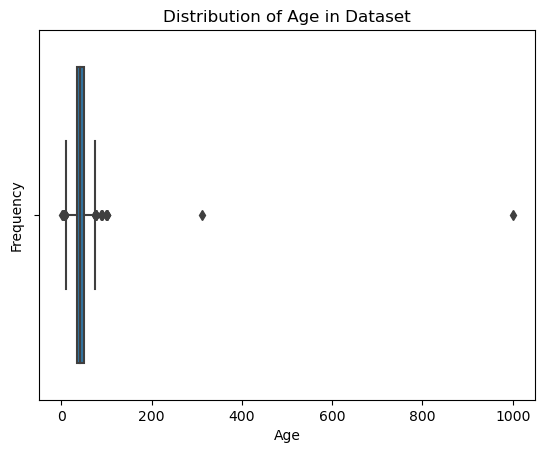

In [18]:

# Create boxplot
sns.boxplot(x=df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Dataset')
plt.show()


In [19]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df['age'] = df['age'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

This line uses the apply() function in pandas to apply a lambda function to each element in the 'age' column of the DataFrame df. Here's a breakdown:

df['age']: This selects the 'age' column from the DataFrame df.
.apply(): This function applies a function along an axis of the DataFrame. In this case, it applies the lambda function to each element in the 'age' column.
lambda x: np.nan if x < lower_bound or x > upper_bound else x: This is a lambda function that takes each element x from the 'age' column. It checks if x is less than the lower bound or greater than the upper bound calculated using the interquartile range (IQR) method. If it is, it replaces that value with np.nan (NaN, which stands for "Not a Number"). Otherwise, it keeps the original value x.
In summary, this line of code replaces any value in the 'age' column of the DataFrame df that falls outside the bounds defined by the IQR method with NaN, effectively removing outliers from the 'age' column.

In [20]:
df['age'].isna().sum()

135

In [21]:
df ['age'].fillna(df['age'].median(), inplace=True)

In [22]:
df['age'].isna().sum()

0

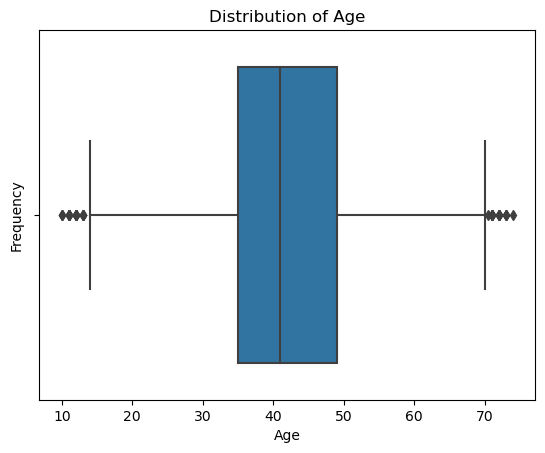

In [23]:
sns.boxplot(x = df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


dtype('int64')

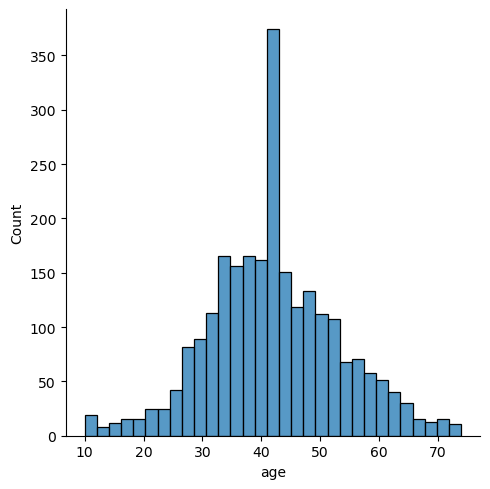

In [24]:
sns.displot(x=df['age'])
df['age'] = df['age'].astype('int64')
df['age'].dtype

country column

In [25]:
df['country'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [26]:
from fuzzywuzzy import process
val_countries = ['usa', 'united states', 'united states of america', 'america', 'uk', 'england', 'united kingdom', \
    'japan', 'canada', 'france', 'germany', 'spain', 'australia', 'sweden', 'switzerland', 'netherlands', 'norway']

df['country'] = df['country'].str.lower()
for country in val_countries:
        matches = process.extract(country, df['country'], limit=df.shape[0])
        for match in matches:
            if match[1] >= 80:
                df.loc[df['country'] == match[0], 'country'] = country

C:\Users\hafei\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [27]:
df['country'].unique()

array([nan, 'usa', 'canada', 'murica', 'america', 'uk', 'uae', 'england',
       'mexico', 'u.s.a.', 'france', 'finland', 'north carolina ',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'ireland', 'korea', 'california', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ud', 'scotland ', 'south korea', 'new jersey', 'indonesia',
       'atlantis', 'murrika', 'alaska', 'soviet canuckistan', 'singapore',
       'china', 'taiwan', 'ireland ', 'hong kong', 'spain', 'sweden',
       'narnia', 'u s a', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [28]:
true_countries = {'america': 'usa', 'murica':'usa', 'u.s.a.':'usa', 'england':'uk', 'new york': 'usa', 'north carolina': 'usa', 'cascadia':'usa', \
    'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'canae':'canada', 'california':'usa', 'ud':'uk', 'new jersey':'usa', 'soviet canuckistan':'canada', \
        'murrika':'usa', 'u s a':'usa', 'hong kong': 'china'}

df['country'].replace(true_countries, inplace= True)
df.value_counts('country') / df.shape[0] * 100

country
usa                               83.821138
canada                             9.268293
uk                                 0.894309
germany                            0.406504
australia                          0.284553
netherlands                        0.284553
japan                              0.203252
china                              0.162602
mexico                             0.162602
scotland                           0.162602
france                             0.121951
switzerland                        0.121951
ireland                            0.121951
sweden                             0.081301
denmark                            0.081301
spain                              0.040650
singapore                          0.040650
south africa                       0.040650
south korea                        0.040650
earth                              0.040650
subscribe to dm4uz3 on youtube     0.040650
taiwan                             0.040650
trumpistan              

In [29]:
last_countries = ['usa', 'canada', 'uk', 'germany', 'australia', 'netherlands', 'japan',\
    'china', 'mexico', 'scotland', 'france', 'switzerland', 'ireland']

df['country'] = df['country'].apply(lambda x: x if x in last_countries else 'other')
df['country'].value_counts() / df.shape[0] * 100

country
usa            83.821138
canada          9.268293
other           3.983740
uk              0.894309
germany         0.406504
netherlands     0.284553
australia       0.284553
japan           0.203252
mexico          0.162602
scotland        0.162602
china           0.162602
france          0.121951
ireland         0.121951
switzerland     0.121951
Name: count, dtype: float64

.apply(lambda x: x if x in last_countries else 'other'): This part applies a function to each value in the 'country' column. The function is defined using a lambda function, which is like a small anonymous function.

For each value x in the 'country' column, it checks if x is in the list last_countries.

If x is in last_countries, it keeps x as it is.

If x is not in last_countries, it replaces x with the string 'other'.

state column

In [30]:
#We have a lot of state names, so we can drop it off.
df.drop('state', axis='columns', inplace=True)

Q6 columns

In [31]:
for index, col in enumerate(df.columns):
    print(f"Column '{col}' has index {index}.")

Column 'going out' has index 0.
Column 'sex' has index 1.
Column 'age' has index 2.
Column 'country' has index 3.
Column 'Q6 | 100 Grand Bar' has index 4.
Column 'Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)' has index 5.
Column 'Q6 | Any full-sized candy bar' has index 6.
Column 'Q6 | Black Jacks' has index 7.
Column 'Q6 | Bonkers (the candy)' has index 8.
Column 'Q6 | Bonkers (the board game)' has index 9.
Column 'Q6 | Bottle Caps' has index 10.
Column 'Q6 | Box'o'Raisins' has index 11.
Column 'Q6 | Broken glow stick' has index 12.
Column 'Q6 | Butterfinger' has index 13.
Column 'Q6 | Cadbury Creme Eggs' has index 14.
Column 'Q6 | Candy Corn' has index 15.
Column 'Q6 | Candy that is clearly just the stuff given out for free at restaurants' has index 16.
Column 'Q6 | Caramellos' has index 17.
Column 'Q6 | Cash, or other forms of legal tender' has index 18.
Column 'Q6 | Chardonnay' has index 19.
Column 'Q6 | Chick-o-Sticks (we don’t know what th

In [32]:
for col in df.columns:
    if col.startswith('Q6'):
        df[col].fillna('Unknown', inplace=True)

In [33]:
print (df.columns[4:-6])

Index(['Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)', 'Q6 | Bonkers (the board game)',
       'Q6 | Bottle Caps', 'Q6 | Box'o'Raisins', 'Q6 | Broken glow stick',
       'Q6 | Butterfinger',
       ...
       'Q6 | Three Musketeers', 'Q6 | Tolberone something or other',
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties'],
      dtype='object', length=103)


In [34]:
for col in df.columns[4:-6]:
    df.rename(columns={col: col[5:]}, inplace=True)

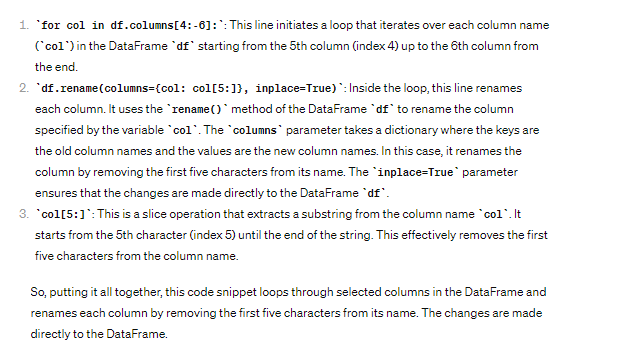

In [35]:
print (df.columns[4:-6])

Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)


dress column

In [36]:
df['dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [37]:
df['dress'].fillna('Other', inplace=True)
df['dress'].unique()

array(['Other', 'White and gold', 'Blue and black'], dtype=object)

day column

In [38]:
df['day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [39]:
df['day'].fillna('Other', inplace=True)
df['day'].unique()

array(['Other', 'Sunday', 'Friday'], dtype=object)

last few columns

In [40]:
df.isna().sum()[df.isna().sum() > 0]

daily dish    2375
science       1098
espn          2361
yahoo         2393
dtype: int64

In [41]:
for col in df.columns[-4:]:
    df[col].fillna(0, inplace=True)

In [42]:
df['No Page'] = df['daily dish'] + df['science'] + df['espn'] + df['yahoo'].apply(lambda x : 1 if x == 0 else 0)

In [43]:
for col in df.columns[-5:]:
    df[col] = df[col].astype(int)
    print(df[col].value_counts(normalize=True) * 100, '\n')

daily dish
0    96.544715
1     3.455285
Name: proportion, dtype: float64 

science
1    55.365854
0    44.634146
Name: proportion, dtype: float64 

espn
0    95.97561
1     4.02439
Name: proportion, dtype: float64 

yahoo
0    97.276423
1     2.723577
Name: proportion, dtype: float64 

No Page
2    62.845528
1    34.430894
0     2.723577
Name: proportion, dtype: float64 



checking

In [44]:
check = pd.DataFrame({"Type": df.dtypes, "Null": [df[col].isnull().sum() for col in df.columns]})
check

,Type,Null
going out,object,0
sex,object,0
age,int64,0
country,object,0
100 Grand Bar,object,0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),object,0
Any full-sized candy bar,object,0
Black Jacks,object,0
Bonkers (the candy),object,0
Bonkers (the board game),object,0


In [45]:
df_1 = df.describe(include= 'object')
df_1

,going out,sex,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,Hugs (actual physical hugs),...,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
count,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,...,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460
unique,3,3,14,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3
top,No,Male,usa,JOY,DESPAIR,JOY,Unknown,Unknown,Unknown,Unknown,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,Unknown,DESPAIR,Unknown,DESPAIR,DESPAIR,Unknown,JOY,Unknown,DESPAIR,MEH,Unknown,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,...,JOY,JOY,DESPAIR,JOY,JOY,Unknown,DESPAIR,DESPAIR,Unknown,DESPAIR,JOY,JOY,Unknown,JOY,DESPAIR,JOY,JOY,Unknown,JOY,JOY,DESPAIR,JOY,JOY,JOY,Unknown,Unknown,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,Unknown,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
freq,2038,1467,2062,873,1089,1559,958,992,1006,765,1179,1625,1177,820,743,1325,953,1439,1040,946,761,853,1406,1433,729,1176,823,1176,703,879,742,1462,748,907,855,1069,1105,896,834,889,...,904,857,805,769,1188,817,1085,1076,722,1480,1498,1136,1014,1151,1151,829,729,901,1399,770,1140,853,783,754,1002,917,754,1252,1058,1320,836,1413,1146,789,840,1455,1289,1105,1081,1091


Analysis

In [46]:
df_2 = df_1.iloc[[2,3],3:-2].T
df_2.head()

,top,freq
100 Grand Bar,JOY,873
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),DESPAIR,1089
Any full-sized candy bar,JOY,1559
Black Jacks,Unknown,958
Bonkers (the candy),Unknown,992


In [47]:
most_loved_choc = df_2[df_2['top'] == 'JOY'].sort_values('freq', ascending=False).head(10)
most_loved_choc

,top,freq
Any full-sized candy bar,JOY,1559
Reese’s Peanut Butter Cups,JOY,1498
Kit Kat,JOY,1447
"Cash, or other forms of legal tender",JOY,1439
Twix,JOY,1413
Snickers,JOY,1399
Tolberone something or other,JOY,1320
Peanut M&M’s,JOY,1291
Lindt Truffle,JOY,1277
Nestle Crunch,JOY,1188


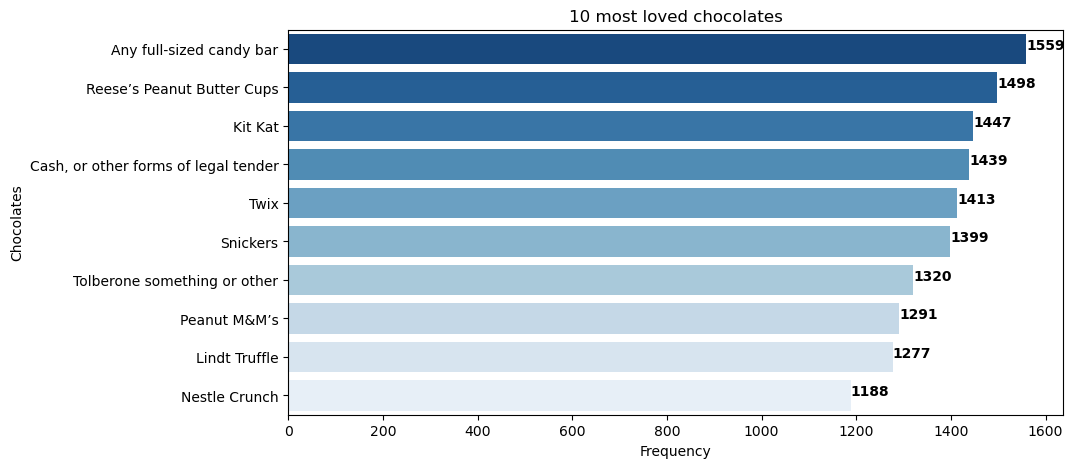

In [107]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=most_loved_choc, x='freq', y=most_loved_choc.index, palette= 'Blues_r', )
for i, v in enumerate(most_loved_choc['freq']):
    ax.text(v, i , str(round(v, 2)), color='black', fontweight = 'bold')
plt.title("10 most loved chocolates",)
plt.xlabel("Frequency")
plt.ylabel("Chocolates")
plt.show()

In [109]:
most_hated_choc= df_2[df_2['top'] == 'DESPAIR'].sort_values('freq', ascending=False).head(10)
most_hated_choc


,top,freq
Broken glow stick,DESPAIR,1625
Real Housewives of Orange County Season 9 Blue-Ray,DESPAIR,1480
Gum from baseball cards,DESPAIR,1462
White Bread,DESPAIR,1455
Kale smoothie,DESPAIR,1435
Dental paraphenalia,DESPAIR,1433
Creepy Religious comics/Chick Tracts,DESPAIR,1406
Candy that is clearly just the stuff given out for free at restaurants,DESPAIR,1325
Whole Wheat anything,DESPAIR,1289
Those odd marshmallow circus peanut things,DESPAIR,1252


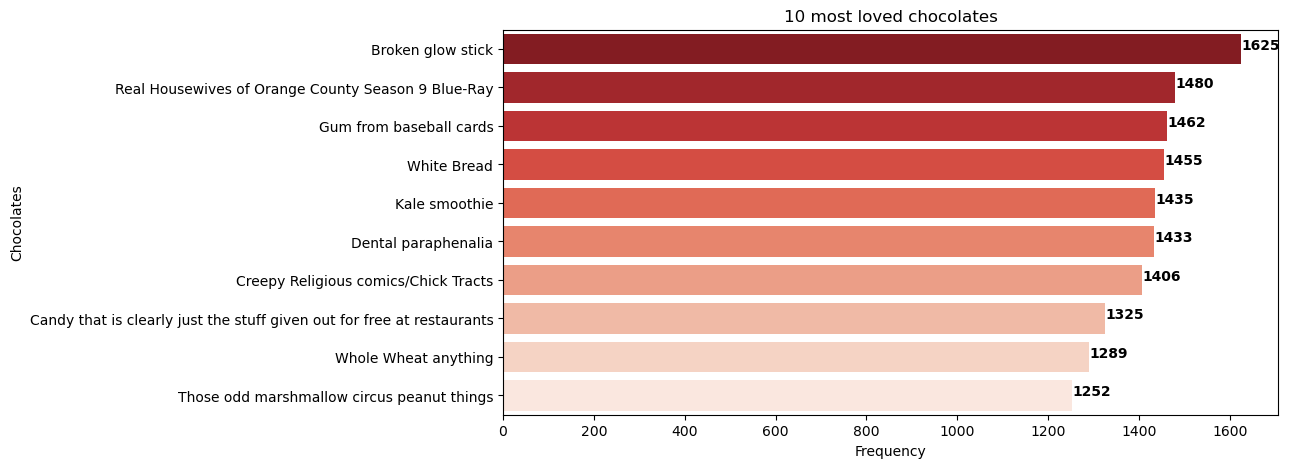

In [119]:
plt.figure(figsize=(10,5))
ax= sns.barplot(data=most_hated_choc, x='freq', y=most_hated_choc.index, palette='Reds_r')
for i, v in enumerate(most_hated_choc['freq']):
    ax.text(v + 1, i, str(round(v, 2)), color='black', fontweight = 'bold')
plt.title("10 most loved chocolates",)
plt.xlabel("Frequency")
plt.ylabel("Chocolates")
plt.show()


1. First, we eliminated all unnecessary columns and those with excessive NaN values.
2. Next, we simplified column names for ease of use.
3. We addressed the 'going out' column by substituting NaN values with 'Maybe' for clarity.
4. The 'sex' column was cleaned by replacing NaNs with 'Didn't say' for completeness.
5. NaNs in the 'age' column were filled with the median age for consistency.
6. For the 'country' column, NaNs were replaced with 'Other' and we utilized fuzzywuzzy to handle variations in spelling.
7. The 'area' column was removed as part of the cleaning process.
8. NaNs in the 'Q6' columns were replaced with 'Unknown' for better understanding.
9. NaNs in the 'dress' column were substituted with 'Other' to maintain integrity.
10. NaNs in the 'day' column were replaced with 'Other' for clarity.
11. Finally, we conducted a thorough check of the data, ensuring correct data types, absence of NaN values, and overall cleanliness of all columns. and did some Exploratory Data Analysis (EDA).
